In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xg
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

In [11]:
#aqui va la conexion al sql (postgress)
df = pd.read_csv("../datos/iris.csv")

#
df = df.drop("Id",axis = 1)
df.columns = [i.lower() for i in df.columns]

<AxesSubplot:xlabel='sepallengthcm', ylabel='petallengthcm'>

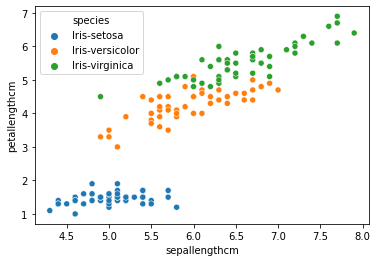

In [23]:
sns.scatterplot(x="sepallengthcm",y="petallengthcm",hue="species",data=df)

In [35]:
dic = {'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}

df["species_codi"]  = df["species"].map(dic)
X                   = df[["sepallengthcm","petallengthcm"]]
y                   = df["species_codi"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.89      0.94      0.92        18
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.93        45
      macro avg       0.93      0.92      0.93        45
   weighted avg       0.93      0.93      0.93        45



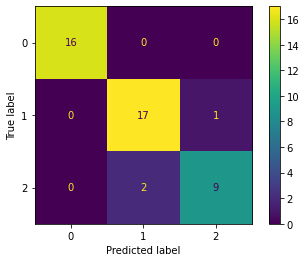

In [41]:
#random forest
clf                 = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
target_names        = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
y_pred              = clf.predict(X_test)


print(classification_report(y_test, y_pred, target_names=target_names))
plot_confusion_matrix(clf, X_test, y_test)  